In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#relative path
relative_path = 'ppk_growth.csv'
# Load the csv data 
df = pd.read_csv(relative_path, delimiter=';')
df
# Abouth the data: estimation of bacterial growth
# Absorvance at OD5600 for members of the PPK community, quantified at 5 different time points (day 1 to day 5) 
# for the single cultures: Pao1, KP1, PF5, all the 2 by 2 combinatios, and the triple culture.


,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,"0,2843","0,3362","0,3364","0,3236","0,316","0,3159","0,2986","0,2876",1
1,KP1,"0,279","0,2659","0,2592","0,2617","0,2645","0,263","0,2677","0,2668",1
2,PF5,"0,2392","0,2564","0,2948","0,2997","0,2617","0,3086","0,2755","0,2121",1
3,Pao1_KP1,"0,2674","0,3248","0,3036","0,3161","0,3301","0,3073","0,305","0,2791",1
4,Pao1_KP1,"0,2916","0,3141","0,3129","0,322","0,3256","0,3134","0,3065","0,2981",1
5,Pao1_PF5,"0,2631","0,3158","0,3217","0,2903","0,3077","0,2816","0,3285","0,2832",1
6,Pao1_PF5,"0,2635","0,3064","0,3046","0,3031","0,2941","0,2992","0,3514","0,2878",1
7,KP1_PF5,"0,2172","0,3025","0,3164","0,3152","0,3248","0,3284","0,3439","0,3166",1
8,TC,"0,2527","0,2955","0,3134","0,2864","0,2814","0,282","0,2706","0,2734",1
9,TC,"0,2585","0,2889","0,2913","0,2918","0,2791","0,2881","0,2725","0,2725",1


In [3]:
#change the decimal separator from ',' to '.' so the numbers with decimals will be recognized as such

df['1'] = df['1'].str.replace(',', '.').astype(float)
df['2'] = df['2'].str.replace(',', '.').astype(float)
df['3'] = df['3'].str.replace(',', '.').astype(float)
df['4'] = df['4'].str.replace(',', '.').astype(float)
df['5'] = df['5'].str.replace(',', '.').astype(float)
df['6'] = df['6'].str.replace(',', '.').astype(float)
df['7'] = df['7'].str.replace(',', '.').astype(float)
df['8'] = df['8'].str.replace(',', '.').astype(float)

In [4]:
df

,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,0.2843,0.3362,0.3364,0.3236,0.3160,0.3159,0.2986,0.2876,1
1,KP1,0.2790,0.2659,0.2592,0.2617,0.2645,0.2630,0.2677,0.2668,1
2,PF5,0.2392,0.2564,0.2948,0.2997,0.2617,0.3086,0.2755,0.2121,1
3,Pao1_KP1,0.2674,0.3248,0.3036,0.3161,0.3301,0.3073,0.3050,0.2791,1
4,Pao1_KP1,0.2916,0.3141,0.3129,0.3220,0.3256,0.3134,0.3065,0.2981,1
5,Pao1_PF5,0.2631,0.3158,0.3217,0.2903,0.3077,0.2816,0.3285,0.2832,1
6,Pao1_PF5,0.2635,0.3064,0.3046,0.3031,0.2941,0.2992,0.3514,0.2878,1
7,KP1_PF5,0.2172,0.3025,0.3164,0.3152,0.3248,0.3284,0.3439,0.3166,1
8,TC,0.2527,0.2955,0.3134,0.2864,0.2814,0.2820,0.2706,0.2734,1
9,TC,0.2585,0.2889,0.2913,0.2918,0.2791,0.2881,0.2725,0.2725,1


In [5]:
# data points with more than 3 times the standar deviation away from the mean will be removed using z scores

z_scores = np.abs(stats.zscore(df.iloc[:, 1:-1]))  # Exclude the first and last columns
threshold = 3  # Adjust this threshold as needed
outliers = np.where(z_scores > threshold)
df_cleaned = df.drop(outliers[0])
df_cleaned

,Culture,1,2,3,4,5,6,7,8,Day
0,Pao1,0.2843,0.3362,0.3364,0.3236,0.3160,0.3159,0.2986,0.2876,1
1,KP1,0.2790,0.2659,0.2592,0.2617,0.2645,0.2630,0.2677,0.2668,1
2,PF5,0.2392,0.2564,0.2948,0.2997,0.2617,0.3086,0.2755,0.2121,1
3,Pao1_KP1,0.2674,0.3248,0.3036,0.3161,0.3301,0.3073,0.3050,0.2791,1
4,Pao1_KP1,0.2916,0.3141,0.3129,0.3220,0.3256,0.3134,0.3065,0.2981,1
5,Pao1_PF5,0.2631,0.3158,0.3217,0.2903,0.3077,0.2816,0.3285,0.2832,1
6,Pao1_PF5,0.2635,0.3064,0.3046,0.3031,0.2941,0.2992,0.3514,0.2878,1
7,KP1_PF5,0.2172,0.3025,0.3164,0.3152,0.3248,0.3284,0.3439,0.3166,1
8,TC,0.2527,0.2955,0.3134,0.2864,0.2814,0.2820,0.2706,0.2734,1
9,TC,0.2585,0.2889,0.2913,0.2918,0.2791,0.2881,0.2725,0.2725,1


In [6]:
means = df_cleaned.groupby(['Culture', 'Day']).mean()
stds = df_cleaned.groupby(['Culture', 'Day']).std()

In [7]:
melted_df = pd.melt(df_cleaned, id_vars=['Culture', 'Day'], var_name='Replicate', value_name='Value')
melted_df

,Culture,Day,Replicate,Value
0,Pao1,1,1,0.2843
1,KP1,1,1,0.2790
2,PF5,1,1,0.2392
3,Pao1_KP1,1,1,0.2674
4,Pao1_KP1,1,1,0.2916
...,...,...,...,...
475,KP1_PF5,5,8,0.4542
476,TC,5,8,0.2445
477,TC,5,8,0.2436
478,TC,5,8,0.2494


In [8]:
means = df_cleaned.groupby(['Culture', 'Day']).mean()
stds = df_cleaned.groupby(['Culture', 'Day']).std()

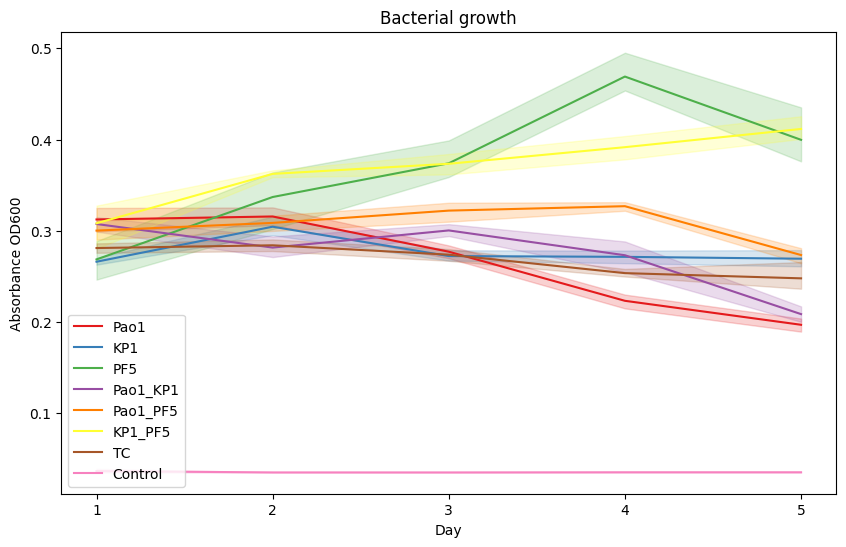

In [12]:
%matplotlib inline
# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Your seaborn code here

#### constructing the figuere: 
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")

# Assuming 'Culture' is the column containing treatment names
treatments = melted_df['Culture'].unique()

for treatment in treatments:
    data = melted_df[melted_df['Culture'] == treatment]
    sns.lineplot(data=data, x='Day', y='Value', label=treatment)

plt.xlabel('Day')
plt.ylabel('Absorbance OD600')
plt.title('Bacterial growth')
plt.xticks([1, 2, 3, 4, 5])
plt.legend(loc='lower left')
plt.show()



# Restore warnings to their default behavior (optional)
warnings.resetwarnings()

In [10]:
####### this is for saving the figure as a .png file in the computer ########

# Suppress seaborn warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#Use the Agg backend for saving figures
import matplotlib
matplotlib.use('Agg')  # Use the Agg backend for saving figures


# Your seaborn code here

# Constructing the figure
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")

# Assuming 'Culture' is the column containing treatment names
treatments = melted_df['Culture'].unique()

for treatment in treatments:
    data = melted_df[melted_df['Culture'] == treatment]
    sns.lineplot(data=data, x='Day', y='Value', label=treatment)

plt.xlabel('Day')
plt.ylabel('Absorbance OD600')
plt.title('Bacterial growth')
plt.xticks([1, 2, 3, 4, 5])
plt.legend()

# Save the figure with a file path
plt.savefig('/Users/agramont/Library/CloudStorage/OneDrive-Chalmers/Community models/Bacterial_growth1.png', dpi=300, bbox_inches='tight')  # Specify your desired file path

# Close the figure
plt.close()


# Restore warnings to their default behavior (optional)
warnings.resetwarnings()